## Part1:Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import glob
import platform
print(platform.architecture())

('64bit', '')


In [9]:
file_list = glob.glob('./data/*.csv')
file_list

['./data/test.csv', './data/train.csv', './data/gender_submission.csv']

In [10]:
data = pd.read_csv(file_list[1])

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data.isnull().sum() # NA 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

+ Age, Cabin, Embarked 에 NA 값이 있으니 이를 처리할 방법을 찾아보자

### 생존자는 얼마나 되나?

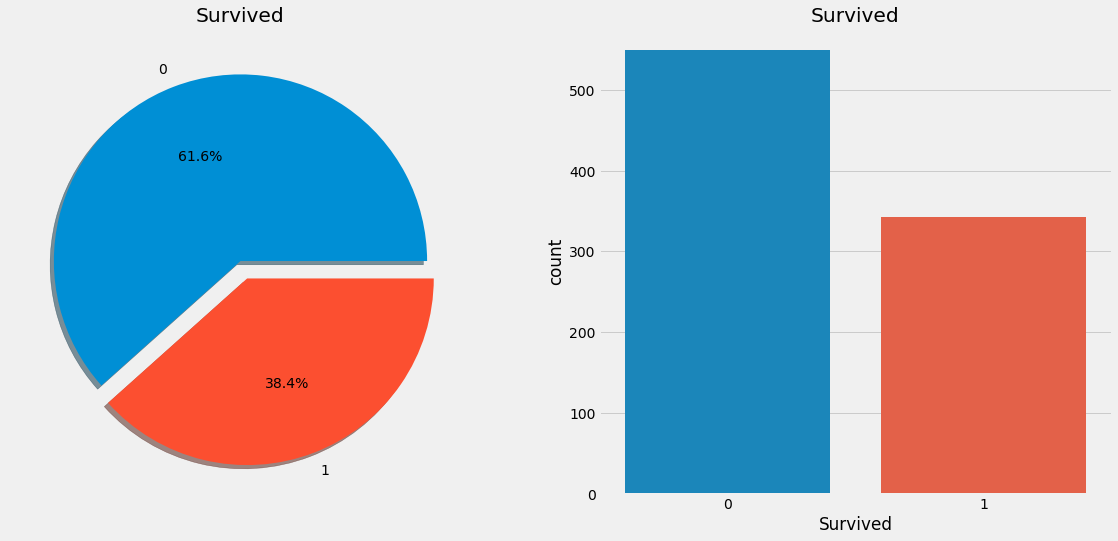

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

## 변수의 종류
   
### 범주형 변수
명목 변수라고도 한다. 순서를 갖지 않아 정렬할 수 없다.
데이터 셋에서 Sex, Embarked가 범주형 변수이다.

### 서열변수
범주형 변수와 유사하나, 대상 간에 높고 낮음을 부여하여 순위를 파악하는 변수이다. 단 변수값에 사칙연산을 적용할 수 없다.
데이터 셋에서 PClass가 서열변수 이다.

### 연속형 변수
최소값과 최대값 사이의 연속된 값을 갖는 변수이다.
데이터 셋에서 Age, Fare가 연속형 변수이다.

## 변수 분석

### Sex ; Categorical Feature

In [14]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

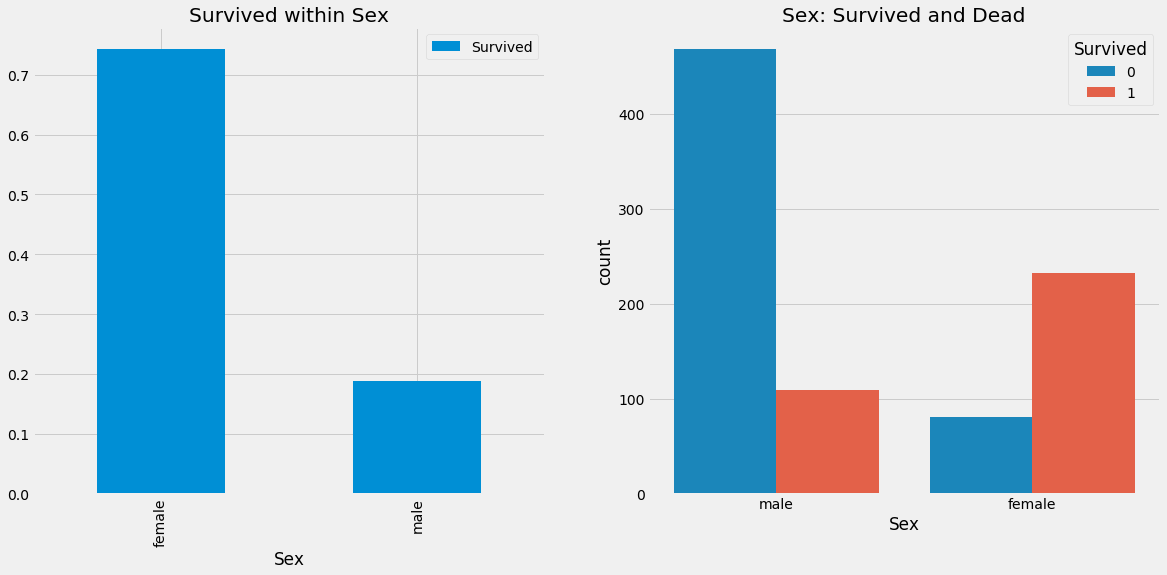

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived within Sex')

sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived and Dead')

plt.show()

+ 남자가 여자보다 많이 탔지만 살아남은 수는 여자가 남자보다 많다.

### Pclass; 서열변수

In [16]:
pd.crosstab(data['Pclass'], data['Survived']).style.background_gradient(cmap='autumn_r')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [17]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


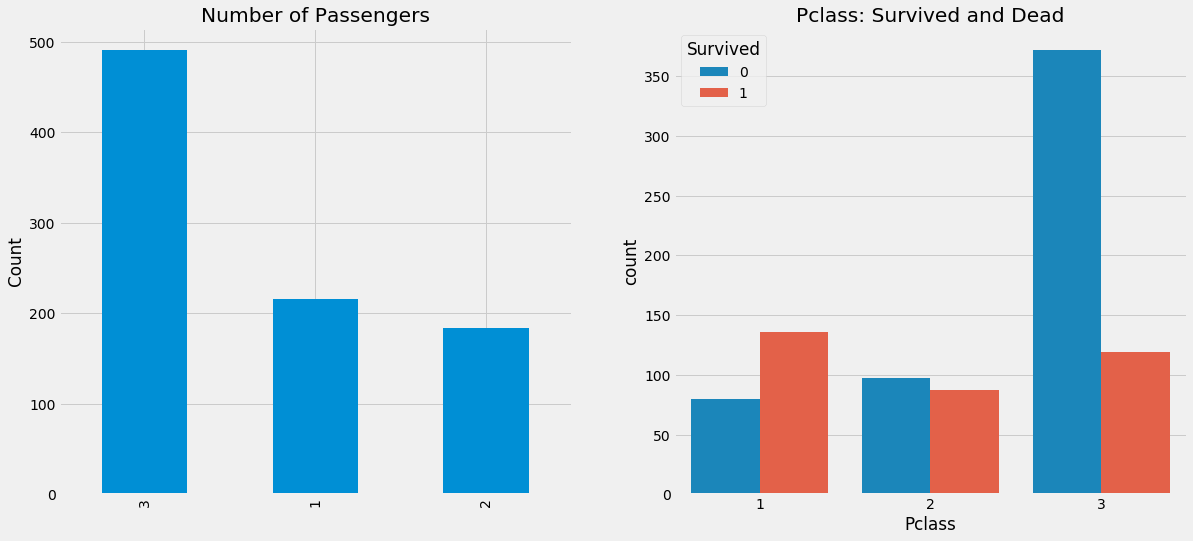

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived and Dead')

plt.show()

In [19]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='autumn_r')

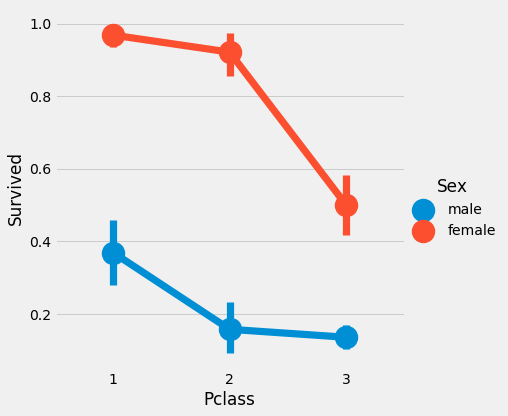

In [20]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data, size=6)
plt.show()

class 1 여성 생존율은 90% 이상. 
모든 pclass에서 여성은 남성보다 생존율이 높다. 
남성과 여성 보두 pclass에 따라 생존율이 변화하는 방향이 같다.

### Age; 연속형 변수

In [24]:
print(f"Oldest Passenger was of: {data['Age'].max()} Years.")
print(f"Youngest Passenger was of: {data['Age'].min()} Years.")
print(f"Average Age of the Passengers: {data['Age'].mean():.2f} Years.")

Oldest Passenger was of: 80.0 Years.
Youngest Passenger was of: 0.42 Years.
Average Age of the Passengers: 29.70 Years.


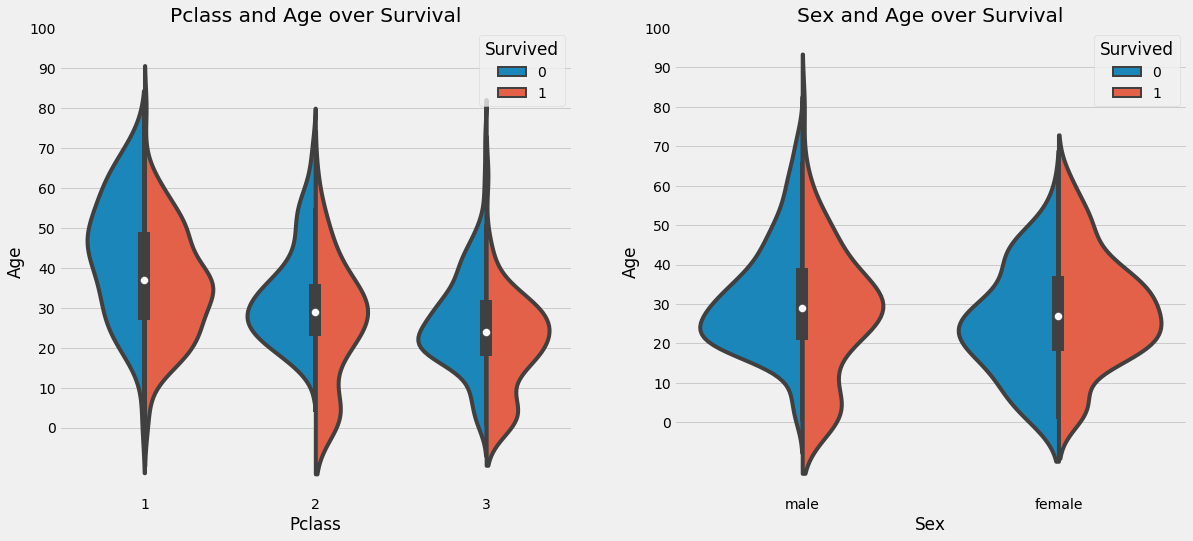

In [41]:
fig, ax = plt.subplots(1,2, figsize=(18, 8))

sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age over Survival')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age over Survival')
ax[1].set_yticks(range(0,110,10))

plt.show()

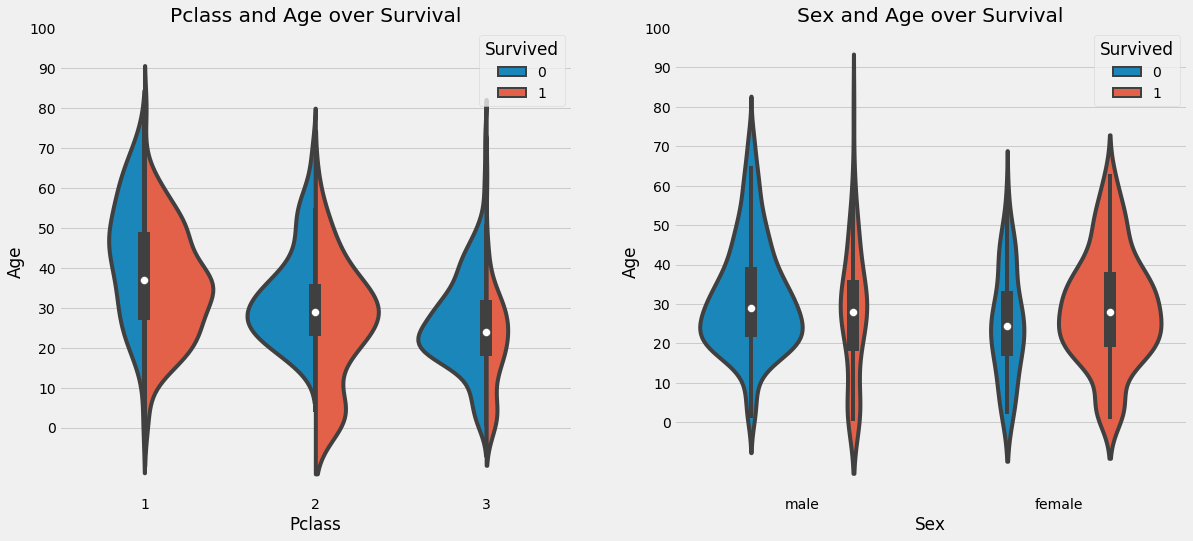

In [42]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(1,2,1)
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, scale='count', ax=ax1)
ax1.set_title('Pclass and Age over Survival')
ax1.set_yticks(range(0,110,10))

ax2 = fig.add_subplot(1,2,2)
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=False, scale='count', ax=ax2)
ax2.set_title('Sex and Age over Survival')
ax2.set_yticks(range(0,110,10))

plt.show()

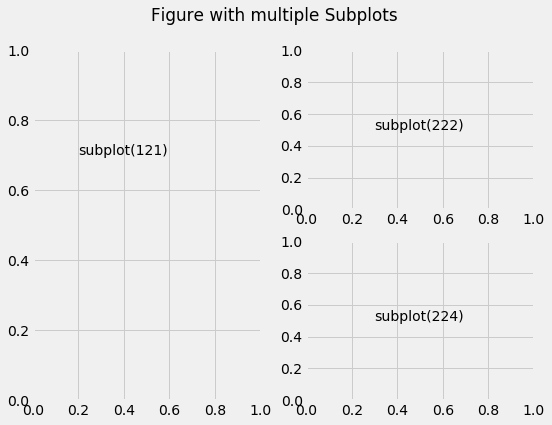

In [35]:
fig=plt.figure(figsize=(8,6))

ax_1=fig.add_subplot(121)
ax_1.text(0.2, 0.7, 'subplot(121)')

ax_2=fig.add_subplot(222)
ax_2.text(0.3, 0.5, 'subplot(222)')

ax_3=fig.add_subplot(224)
ax_3.text(0.3, 0.5, 'subplot(224)')

fig.suptitle("Figure with multiple Subplots")

plt.show()

sclae로 도수를 선택해 주지 않으면 분포 모양은 보기 좋다. 그룹별 도수가 유사하지 않다는 것을 염두에 두어야 한다.

1) the number of children increases with Pclass and the survival rate for passengers below Age 10 looks to be good irrespective of the class. -> In scaled graph, it is uncertain whether children from pclass 3 has good survival rate.

2) survival chances for passengers aged 20-50 from pclass1 is high and is even better for women.

3) for males, the survival chances decrease with an increase in age.

Age feature has 177 null values.

we can check the Name feature. Names have a salutation like Mr or Mrs. We can assign the mean values of Mr and Mrs to the respective group.

In [47]:
# data['Inital'] = 0
for i in data:
    data['Initial']=data['Name'].str.extract('([A-Za-z]+)\.')

In [48]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Inital,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs


In [49]:
data.drop(['Inital'], axis=1, inplace=True)

In [50]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [62]:
for i in data:
    data['Name_first']=data['Name'].str.extract('([A-Za-z]+)')

In [63]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Initial_wdot,Name_first
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,Cumings


In [64]:
for i in data:
    data['Name_wdot']=data['Name'].str.extract('([A-Za-z]+\.)')

In [65]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Initial_wdot,Name_first,Name_wdot
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,Braund,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,Cumings,Mrs.


+ '()' 괄호 안에 정해진 그룹만을 뽑아온다. 괄호 밖에서 추가 조건을 지정해 줄 수 있다. 점으로 끝나는 것을 호칭으로 보고 알파벳으로 시작해서 점으로 끝나는 문자열을 뽑아온다.

In [66]:
data.drop(['Name_first', 'Name_wdot', 'Initial_wdot'], axis=1, inplace=True)

In [67]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [68]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='autumn_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


---
내 맘대로 진행해 본 것들

In [69]:
data.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [81]:
data.groupby(['Initial']).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Initial,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1
Col,2,2,2,2,2,2,2,2,2,2,1,2
Countess,1,1,1,1,1,1,1,1,1,1,1,1
Don,1,1,1,1,1,1,1,1,1,1,0,1
Dr,7,7,7,7,7,6,7,7,7,7,3,7
Jonkheer,1,1,1,1,1,1,1,1,1,1,0,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2
Master,40,40,40,40,40,36,40,40,40,40,7,40


Dr, Master, Miss, Mr, Mrs에서 Age의 누락이 있다. 

In [98]:
data.groupby(['Initial'])['Age'].skew()

Initial
Capt             NaN
Col              NaN
Countess         NaN
Don              NaN
Dr         -0.910786
Jonkheer         NaN
Lady             NaN
Major            NaN
Master      0.612578
Miss        0.578810
Mlle             NaN
Mme              NaN
Mr          1.053480
Mrs         0.288304
Ms               NaN
Rev        -0.438893
Sir              NaN
Name: Age, dtype: float64

첨도를 살펴보면 Dr, Master, Miss, Mr, Mrs 그룹 모두 연령 분포가 심하게 치우치지는 않은 것으로 보인다. 연령이므로 당연할지도 모르겠다. 다만 Dr의 경우 오른쪽에 몰려 왼쪽 꼬리가 긴 분포형태이고 나머지 Master, Miss, Mr, Mrs의 경우 오른쪽 꼬리가 긴 분표형태임을 알 수 있다.

In [99]:
data.groupby(['Initial'])['Age'].std()

Initial
Capt              NaN
Col          2.828427
Countess          NaN
Don               NaN
Dr          12.016655
Jonkheer          NaN
Lady              NaN
Major        4.949747
Master       3.619872
Miss        12.990292
Mlle         0.000000
Mme               NaN
Mr          12.708793
Mrs         11.433628
Ms                NaN
Rev         13.136463
Sir               NaN
Name: Age, dtype: float64

Master이 표준편차는 비교적 작으나 Dr, Miss, Mr, Mrs 모두 표준 편차가 비교적 크다. 

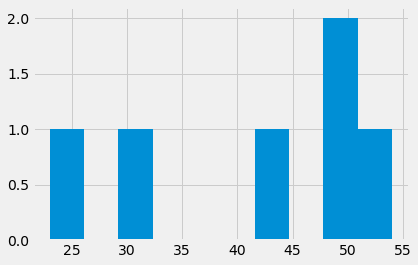

In [105]:
data.groupby(['Initial'])['Age'].get_group('Dr').hist()

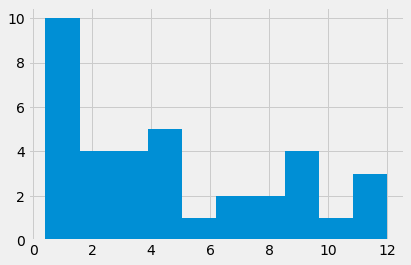

In [106]:
data.groupby(['Initial'])['Age'].get_group('Master').hist()

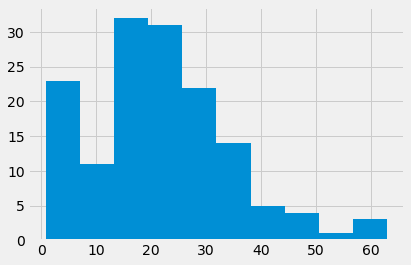

In [107]:
data.groupby(['Initial'])['Age'].get_group('Miss').hist()

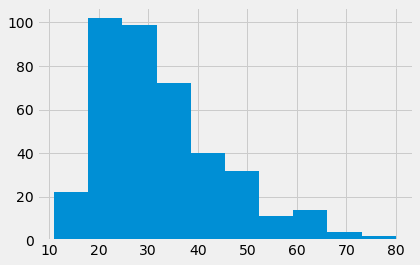

In [109]:
data.groupby(['Initial'])['Age'].get_group('Mr').hist()

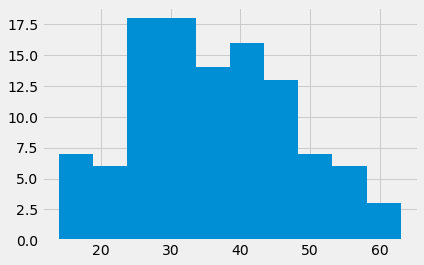

In [110]:
data.groupby(['Initial'])['Age'].get_group('Mrs').hist()

명칭 그룹 별 히스토그램을 그려보니 Dr, Miss, Mr, Mrs 그룹에서 연령대가 넓게 분포되어 있다. 연령의 변화에 따라 생존여부가 크게 영향 받는 다면 누락된 연령 값을 단순하게 평균으로 대치하는 것은 모델의 예측력에 어느정도 영향을 끼칠지 것으로 보인다.

---

In [111]:
# 이니셜의 대체
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'], 
                       ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [112]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Fill NaN Ages

In [113]:
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Master'), 'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 22
data.loc[(data['Age'].isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46

In [114]:
data['Age'].isnull().any()

False

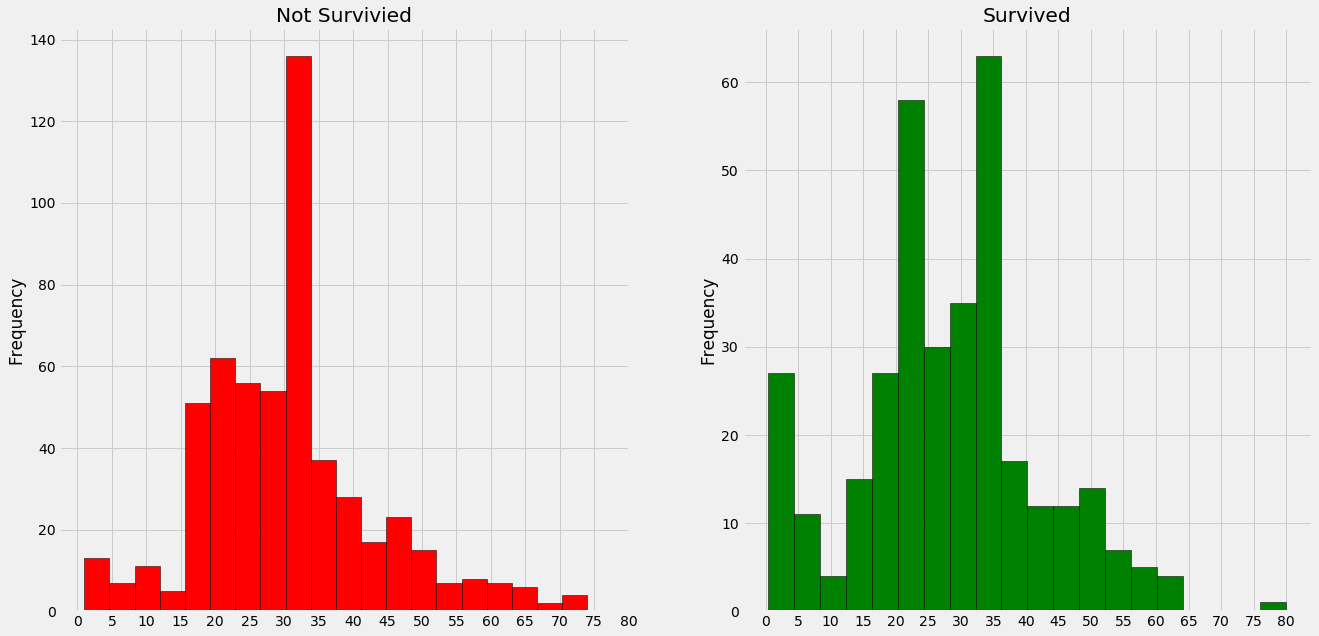

In [115]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

data[data['Survived']==0]['Age'].plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Not Survivied')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1]['Age'].plot.hist(ax=ax[1], bins=20, edgecolor='black', color='green')
ax[1].set_title('Survived')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

#### observations

1) toddlers, younger than 5, were saved in large numbers.

2) the oldest passenger was saved.

3) maximum number of death occured in the age group of 30-40.

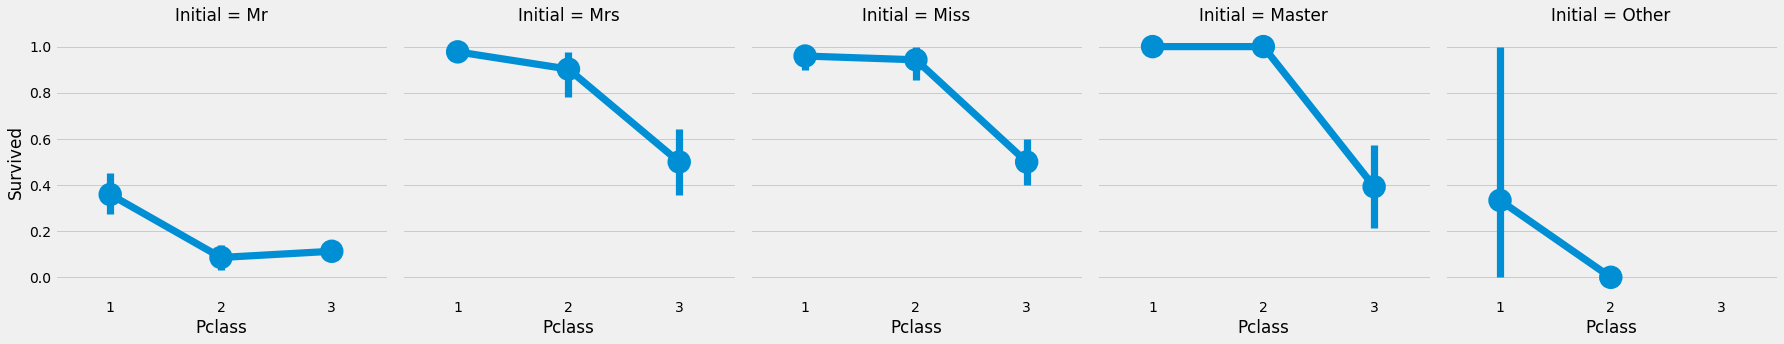

In [116]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

### Embarked; 범주형 변수

In [119]:
pd.crosstab([data['Embarked'], data['Pclass']], [data['Sex'], data['Survived']], margins=True).style.background_gradient(cmap='autumn_r')

### Chances for Survival by Por of Embark

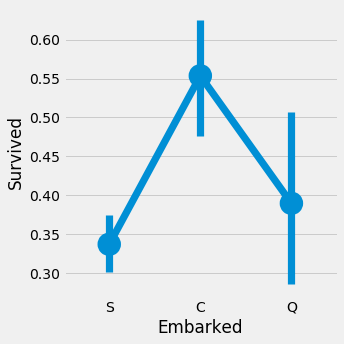

In [120]:
sns.factorplot('Embarked', 'Survived', data=data)
plt.show()

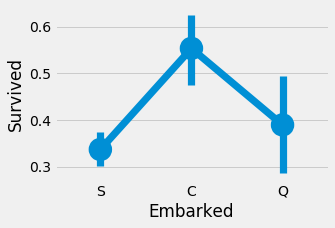

In [122]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf() # get current figure
fig.set_size_inches(5,3)
plt.show()

The chance for survival for port C is highest around 0.55 while S is lowest

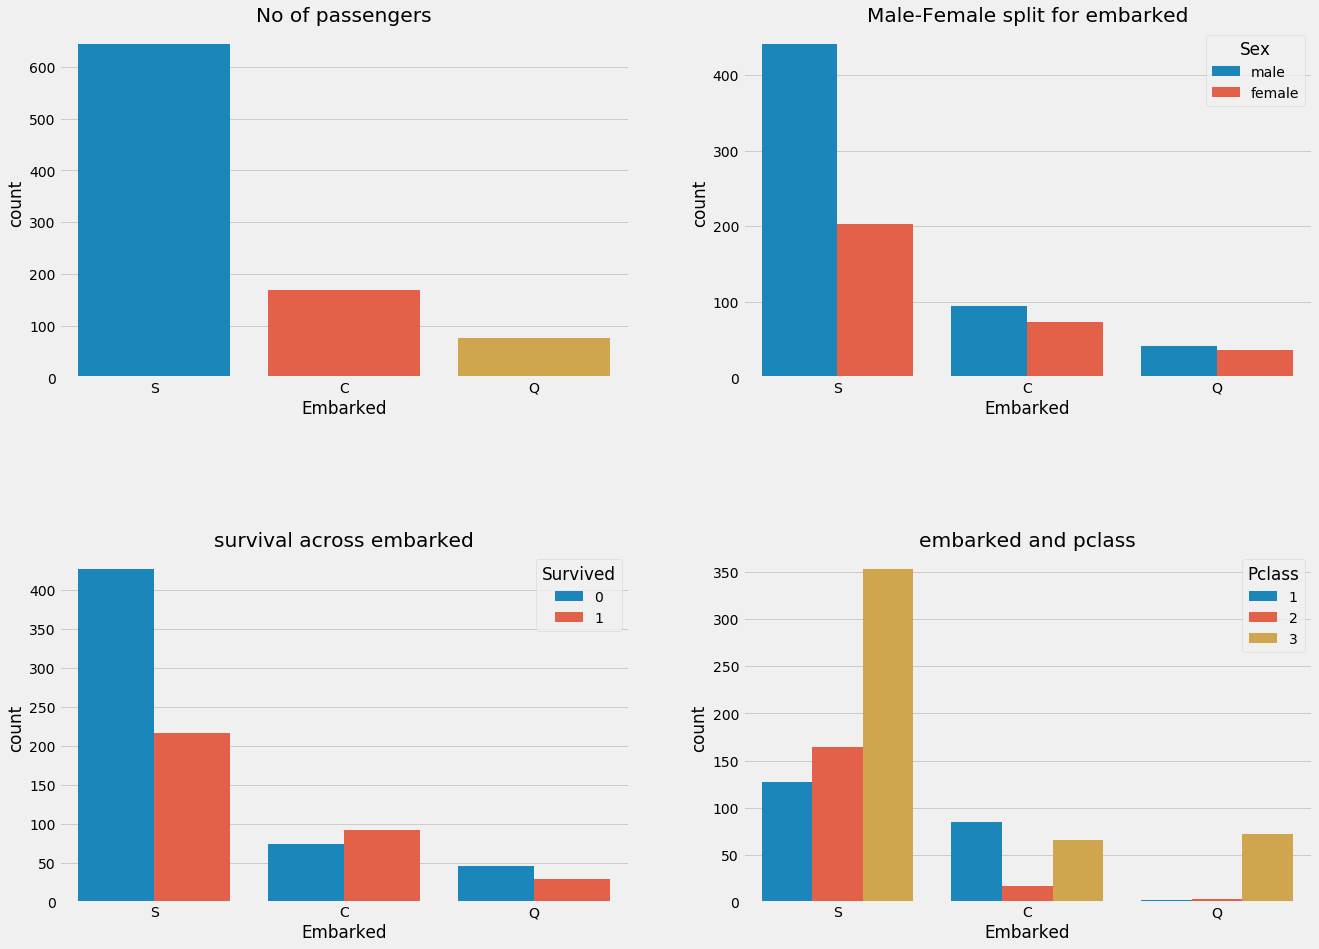

In [128]:
fig, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No of passengers')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('survival across embarked')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('embarked and pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

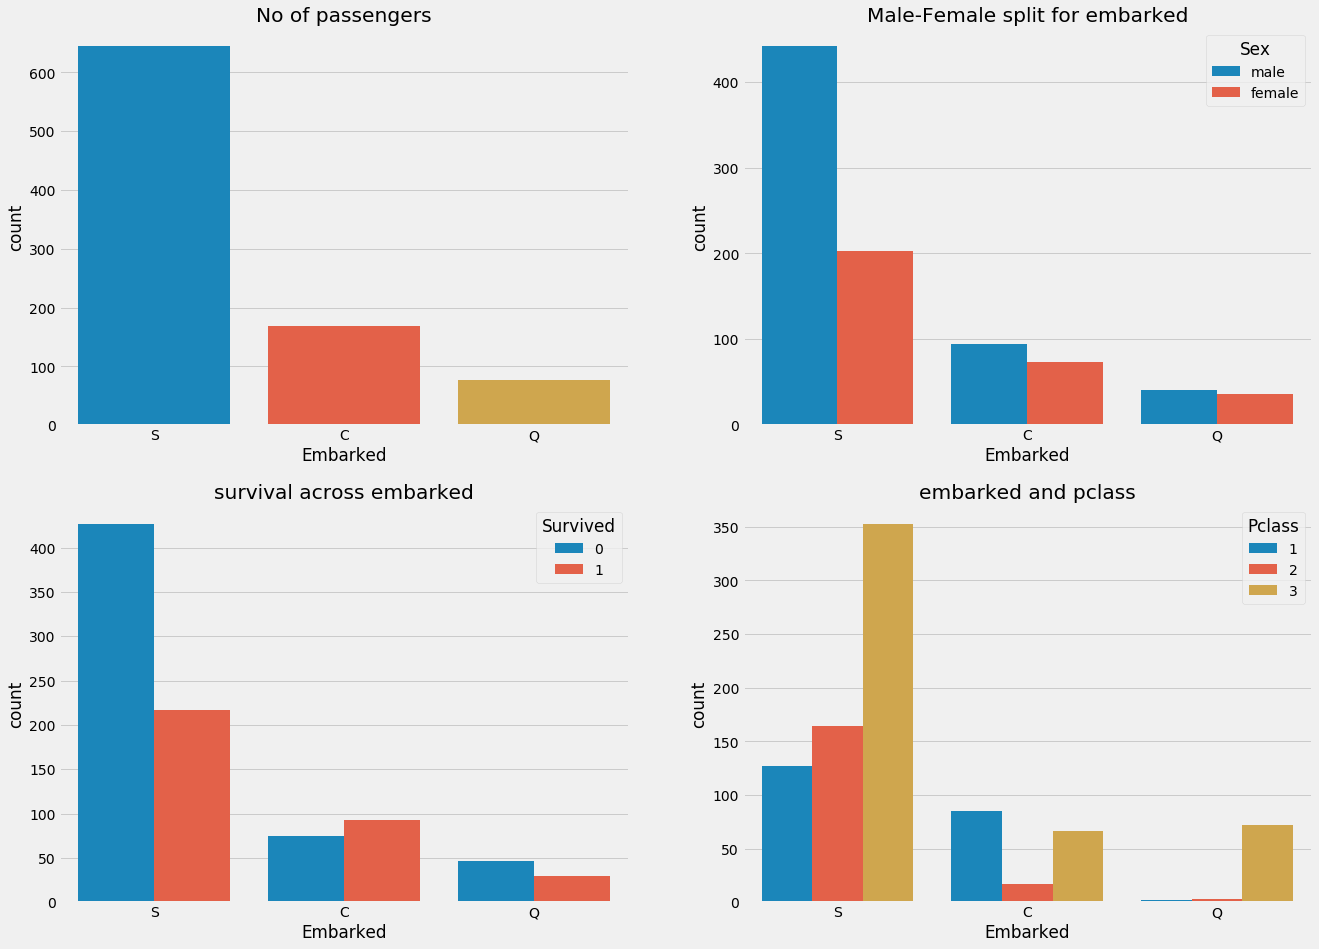

In [129]:
fig, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No of passengers')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('survival across embarked')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('embarked and pclass')

# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### obesrvations
1) larged number of passengers boarded from s. majority of them are pclass3.

2) passengers from c are more likely survived the incident maybe because many of them are pclass1.

3) embark S seems to be the port from where majority of the rich boared the ship. yet the chances for survival is relatively low, as majority of the pclass3 also boraed the ship at S.; around 81% of pclass3 did not survive.

4) almost 95% of the passengers boarded from Q are pclass3.

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)